# Pandas - szeregi czasowe

## Series - funkcje dedykowane do szeregów czasowych

 - `Series.asfreq(freq, method=None, normalize=False, fill_value=None)` - zwraca wyrazy szeregu występujące co zadaną częstotliwość `freq`. Częstotliwość zadajemy *stringiem częstotliwości* lub funkcją `pd.offsets`. Podstawowe *stringi*:
     - `'D'` - dzień `Day`,
     - `'B'` - dzień roboczy `BDay`, (tzn. od poniedziałku do piątku)
     - `'W'` - tydzień `Week`; domyślnie otrzymamy szereg pierwszych dni tygodnia (wszystkie niedziele). Jeżeli chcemy otrzymać np. wszystkie poniedziałki, to piszemy `'W-MON'`, wtorki - `'W-TUE'` itd. 
     - `'M'` - kalendarzowy koniec miesiąca `MonthEnd`,
     - `'MS'` - kalendarzowy początek miesiąca `MonthBegin`,
     - `'BM'` - ostatni dzień roboczy w miesiącu `BMonthEnd`,
     - `'BMS'` - pierwszy dzień roboczy w miesiącu `BMonthBegin`,
     - `'Q'` - koniec kwartału `QuarterEnd`,
     - `'QS'` - początek kwartału `QuarterBegin`,
     - `'A'` - koniec roku `YearEnd`,
     - `'AS'` - początek roku `YearBegin`,
     - `'H'` - godzina `Hour`,
     - `'T'` - minuta `Minute`,
     - `'S'` - sekunda `Second`.

    Jeżeli domyślnie przyjmowane ustawienia nie spełniają naszych potrzeb, to korzystamy z funkcji `pd.offsets`. Przykładowo, jeżeli chcemy zwrócić dane z częstotliwością co rok ale na koniec maja, a nie domyślnego grudnia, to zamiast `freq='A'` piszemy `freq=pd.offsets.YearEnd(month=5)`.

    Opcja `method` to wybór sposobu, w jaki mają zostać uzupełnione braki `NaN` w nowo tworzonym szeregu: `'ffill', 'pad'` - kopiuje poprzednią wartość, `'bfill','backfill'` - kopiuje następną wartość. Jeżeli chcemy uzupełnić braki o z góry zadaną wartość, to korzystamy z opcji `fill_value`. Jeżeli `normalize=True`, wszystkie godziny w nowo tworzonym szeregu zostaną zresetowane na północ (24:00);

In [1]:
import numpy as np
import pandas as pd

indeksy=pd.date_range(start='5/1/2021',end='5/31/2021',freq='1D')
s1=pd.Series(range(1,len(indeksy)+1),index=indeksy)
print(s1)

2021-05-01     1
2021-05-02     2
2021-05-03     3
2021-05-04     4
2021-05-05     5
2021-05-06     6
2021-05-07     7
2021-05-08     8
2021-05-09     9
2021-05-10    10
2021-05-11    11
2021-05-12    12
2021-05-13    13
2021-05-14    14
2021-05-15    15
2021-05-16    16
2021-05-17    17
2021-05-18    18
2021-05-19    19
2021-05-20    20
2021-05-21    21
2021-05-22    22
2021-05-23    23
2021-05-24    24
2021-05-25    25
2021-05-26    26
2021-05-27    27
2021-05-28    28
2021-05-29    29
2021-05-30    30
2021-05-31    31
Freq: D, dtype: int64


In [2]:
co_tydzien=s1.asfreq('W-MON')
print(co_tydzien)

2021-05-03     3
2021-05-10    10
2021-05-17    17
2021-05-24    24
2021-05-31    31
Freq: W-MON, dtype: int64


In [3]:
dni_robocze=s1.asfreq('B')
print(dni_robocze)

2021-05-03     3
2021-05-04     4
2021-05-05     5
2021-05-06     6
2021-05-07     7
2021-05-10    10
2021-05-11    11
2021-05-12    12
2021-05-13    13
2021-05-14    14
2021-05-17    17
2021-05-18    18
2021-05-19    19
2021-05-20    20
2021-05-21    21
2021-05-24    24
2021-05-25    25
2021-05-26    26
2021-05-27    27
2021-05-28    28
2021-05-31    31
Freq: B, dtype: int64


 
- `Series.asof(indeks)` - zwraca ostatni niepusty element przed indeksem `indeks`;
- `Series.shift(periods=1, freq=None, fill_value=None)` - przesuwa indeksy o zadaną liczbę okresów `periods` zadanych opcją `freq`. Jeżeli nie zadamy opcji `freq`, dane zostaną przesunięte względem istniejących indeksów o zadaną liczbę okresów obliczonych automatycznie a powstałe braki danych `NaN` zostaną uzupełnione o wartość zadaną przez `fill_value`.

In [4]:
s2=s1.shift(periods=7)
print(s2)

2021-05-01     NaN
2021-05-02     NaN
2021-05-03     NaN
2021-05-04     NaN
2021-05-05     NaN
2021-05-06     NaN
2021-05-07     NaN
2021-05-08     1.0
2021-05-09     2.0
2021-05-10     3.0
2021-05-11     4.0
2021-05-12     5.0
2021-05-13     6.0
2021-05-14     7.0
2021-05-15     8.0
2021-05-16     9.0
2021-05-17    10.0
2021-05-18    11.0
2021-05-19    12.0
2021-05-20    13.0
2021-05-21    14.0
2021-05-22    15.0
2021-05-23    16.0
2021-05-24    17.0
2021-05-25    18.0
2021-05-26    19.0
2021-05-27    20.0
2021-05-28    21.0
2021-05-29    22.0
2021-05-30    23.0
2021-05-31    24.0
Freq: D, dtype: float64


In [5]:
s3=s1.shift(periods=7,fill_value=0)
print(s3)

2021-05-01     0
2021-05-02     0
2021-05-03     0
2021-05-04     0
2021-05-05     0
2021-05-06     0
2021-05-07     0
2021-05-08     1
2021-05-09     2
2021-05-10     3
2021-05-11     4
2021-05-12     5
2021-05-13     6
2021-05-14     7
2021-05-15     8
2021-05-16     9
2021-05-17    10
2021-05-18    11
2021-05-19    12
2021-05-20    13
2021-05-21    14
2021-05-22    15
2021-05-23    16
2021-05-24    17
2021-05-25    18
2021-05-26    19
2021-05-27    20
2021-05-28    21
2021-05-29    22
2021-05-30    23
2021-05-31    24
Freq: D, dtype: int64


In [6]:
s4=s1.shift(periods=7,freq='D')
print(s4)

2021-05-08     1
2021-05-09     2
2021-05-10     3
2021-05-11     4
2021-05-12     5
2021-05-13     6
2021-05-14     7
2021-05-15     8
2021-05-16     9
2021-05-17    10
2021-05-18    11
2021-05-19    12
2021-05-20    13
2021-05-21    14
2021-05-22    15
2021-05-23    16
2021-05-24    17
2021-05-25    18
2021-05-26    19
2021-05-27    20
2021-05-28    21
2021-05-29    22
2021-05-30    23
2021-05-31    24
2021-06-01    25
2021-06-02    26
2021-06-03    27
2021-06-04    28
2021-06-05    29
2021-06-06    30
2021-06-07    31
Freq: D, dtype: int64


- `Series.first_valid_index()` - zwraca indeks pierwszego niepustego wyrazu;
- `Series.last_valid_index()` - zwraca indeks ostatniego niepustego wyrazu;
- `Series.resample(zasada, closed=None, label=None, convention='start', kind=None, loffset=None, limit=None, base=0).metoda()` - bardziej zaawansowana funkcja tworząca z próbek nowy szereg o zadanej częstotliwości (wyłącznie dla szeregów o indeksach w formacie `DatatimeIndex` lub `PeriodIndex`)

    - `metoda()` - metoda resamplowania próbek (domyślnie `mean()`: nowa próbka będzie średnią z próbek z przedziału nowej częstotliwości, dopuszczalne wszystkie funkcje, jakie da się wykonać na szeregu `Series`) albo metoda wypełniania braków danych: do wyboru `pad()` oraz `backfill()`;
    - `zasada` - *string częstotliwości* określający nową częstotliwość próbek;
    - `closed='right'/'left'` - domknięcie przedziału, na którym działa `metoda()`; jeżeli `None`, to domknięcie zostanie dobrane odpowiednio do `zasady`;
    - `label='right'/'left'` - indeks którego krańca przedziału ma zostać nadany nowej obliczonej danej;
    - `convention` - wyłącznie dla indeksów w formacie `PeriodIndex`; zadaje od którego indeksu ma zacząć działać `zasada`; do wyboru `'start'` lub `'end'`;
    - `kind` - wybór typu nowego indeksu: `'timestamp'` zwróci indeks `DatatimeIndex`, `'period'` zwróci `PeriodIndex`;
    - `loffset` - ustawienie przesunięcia dla nowo tworzonych indeksów w formacie `timedelta` (np. gdy chcemy, aby nowe indeksy pokazywały środek przedziału, a nie początek lub koniec);
    - `base` - wybór momentu startu dla częstotliwości będących dzielnikami pełnego dnia (24 h);

In [7]:
s5=s1.resample('W-FRI').sum()
print(s5)

2021-05-07     28
2021-05-14     77
2021-05-21    126
2021-05-28    175
2021-06-04     90
Freq: W-FRI, dtype: int64


In [8]:
s6=s1.resample('W-SAT',closed='left',label='left').sum()
print(s6)

2021-05-01     28
2021-05-08     77
2021-05-15    126
2021-05-22    175
2021-05-29     90
Freq: W-SAT, dtype: int64


- `Series.at_time(czas)` - zwróci próbki pobrane o konkretnej godzinie `czas`;
- `Series.between_time(poczatek, koniec, include_start=True, include_end=True)` - zwraca próbki pobrane w czasie miedzy `poczatek` a `koniec`; pozostałe dwa parametry określają, czy próbki pobrane w czasach granicznych również mają zostać zwrócone;
- `Series.tshift(periods=1)` - przesunięcie indeksu o zadaną liczbę częstotliwości indeksu (wyłącznie dla prawdziwych szeregów czasowych);

In [9]:
s7=s1.tshift(periods=3)
print(s7)

2021-05-04     1
2021-05-05     2
2021-05-06     3
2021-05-07     4
2021-05-08     5
2021-05-09     6
2021-05-10     7
2021-05-11     8
2021-05-12     9
2021-05-13    10
2021-05-14    11
2021-05-15    12
2021-05-16    13
2021-05-17    14
2021-05-18    15
2021-05-19    16
2021-05-20    17
2021-05-21    18
2021-05-22    19
2021-05-23    20
2021-05-24    21
2021-05-25    22
2021-05-26    23
2021-05-27    24
2021-05-28    25
2021-05-29    26
2021-05-30    27
2021-05-31    28
2021-06-01    29
2021-06-02    30
2021-06-03    31
Freq: D, dtype: int64


/tmp/ipykernel_24873/461580100.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  s7=s1.tshift(periods=3)


- `Series.slice_shift(periods=1)` - uproszczona funkcja `tshift`, bez kopiowania danych (szybsze wykonanie w przypadku dużych zbiorów danych).

## DataFrame - funkcje dedykowane do szeregów czasowych

W przypadku ramek `DataFrame` każda kolumna ramki jest traktowana jak osobny szereg czasowy.

- `DataFrame.asfreq(freq, method=None, normalize=False, fill_value=None)` - jak dla `Series`; działa na kolumnach;
- `DataFrame.asof(indeks, subset=None)` - zwraca ostatnie niepuste elementy przed indeksem `indeks`, `subset` umożliwia wybór podzbioru kolumn, na których funkcja ma być wykonana;
- `DataFrame.shift(periods=1, freq=None, axis=0, fill_value=None)` - przesuwa indeksy wzdłuż wybranej osi `axis` o zadaną liczbę okresów `periods` wyliczonych automatycznie lub zadanych opcją `freq`;
- `DataFrame.tshift(periods=1, axis=0)` - przesunięcie indeksu wzdłuż zadanej osi o zadaną liczbę częstotliwości indeksu (wyłącznie dla prawdziwych szeregów czasowych);
- `DataFrame.slice_shift(periods=1, axis=0)` - uproszczona funkcja `tshift`;
- `DataFrame.first_valid_index()` - zwraca indeks pierwszego niepustego wiersza; jeżeli wszystkie wiersze są niepuste lub wszystkie są puste, zwróci `None`;
- `DataFrame.last_valid_index()` - zwraca indeks ostatniego niepustego wiersza; jeżeli wszystkie wiersze są niepuste lub wszystkie są puste, zwróci `None`;
- `DataFrame.resample(zasada, axis=0, closed=None, label=None, convention='start', kind=None, loffset=None, limit=None, base=0).metoda()` - tworzy z próbek nowy szereg o zadanej częstotliwości wzdłuż wybranej osi (wyłącznie dla osi o indeksach w formacie `DataTimeIndex` lub `PeriodIndex`);
- `DataFrame.to_period(freq=None, axis=0, copy=True)` - konwertuje indeks wzdłuż zadanej osi z `DatetimeIndex` na `PeriodIndex` o zadanej częstotliwości `freq`;
- `DataFrame.to_timestamp(freq=None, how='start', axis=0, copy=True)` - przekształaca indeks wdłuż wybranej osi `axis` na `DatatimeIndex`:

    - `freq` - żądana częstotliwość,
    - `how=‘start’/‘end’` - przy przekształcaniu z `PeriodIndeks` wybór, czy nowy indeks ma być początkiem, czy końcem starego przedziału czasowego,
    - `copy` - pozwala wyłączyć kopiowanie danych (przydatne przy dużych zbiorach danych).

## Zadanie 1.
Utworzyć szereg czasowy dwudziestu kolejnych liczb naturalnych o indeksach rozpoczynających się 13 czerwca 2019 r. o godz. 16:30 z częstotliwością co minutę. Za pomocą funkcji `resample`:
 - utworzyć nowy szereg zawierający sumy liczb z przedziałów o długości 4 minut,
 - utworzyć nowy szereg zawierający maksymalne wartości z przedziałów o długości 5 minut w dwóch wersjach: domknięte prawe końce oraz domknięte lewe końce przedziałów.

In [10]:
time_series_index=pd.date_range(start="2019-06-13 16:30:00", periods=20, freq="1T")
time_series=pd.Series(range(0,20),index=time_series_index)
time_series_4min=time_series.resample(rule="4T",offset="2T").sum()
time_series_max_left=time_series.resample(rule="5T",closed="left").max()
time_series_max_right=time_series.resample(rule="5T",closed="right").max()
#print(time_series)
print(time_series_max_left)
print(time_series_max_right)

2019-06-13 16:30:00     4
2019-06-13 16:35:00     9
2019-06-13 16:40:00    14
2019-06-13 16:45:00    19
Freq: 5T, dtype: int64
2019-06-13 16:25:00     0
2019-06-13 16:30:00     5
2019-06-13 16:35:00    10
2019-06-13 16:40:00    15
2019-06-13 16:45:00    19
Freq: 5T, dtype: int64


## Zadanie 2.
Utworzyć szereg czasowy stu losowych próbek z przedziału $[0,10]$ o indeksach rozpoczynających się 1 czerwca 2019 r. o godz. 8:00 z częstotliwością co pół godziny.
 - Utworzyć nowy szereg zawierający wyłącznie próbki pobrane w południe,
 - utworzyć nowy szereg zawierający wyłącznie próbki pobrane między 10:00 a 18:00,
 - w oryginalnym szeregu przesunąć indeksy o jeden dzień do przodu.

In [11]:
import random
time_series_index=pd.date_range(start="2019-06-01 8:00:00", periods=100, freq="30T")
time_series=pd.Series([random.random() for _ in range(100)],index=time_series_index)
time_series_noon=time_series.at_time(time="12:00:00")
time_series_10_18=time_series.between_time(start_time="10:00:00", end_time="18:00:00")
time_series=time_series.shift(periods=1,freq='D')

## Zadanie 3.
Z pliku `archiwum_tab_a_2019.csv` zaimportować kurs dolara amerykańskiego i kurs euro.
 - Utworzyć wykresy kursów w każdy poniedziałek. W razie potrzeby uzupełnić brakujące dane.
 - Utworzyć wykres średnich notowań kursu w każdym tygodniu.

<Axes: xlabel='data'>

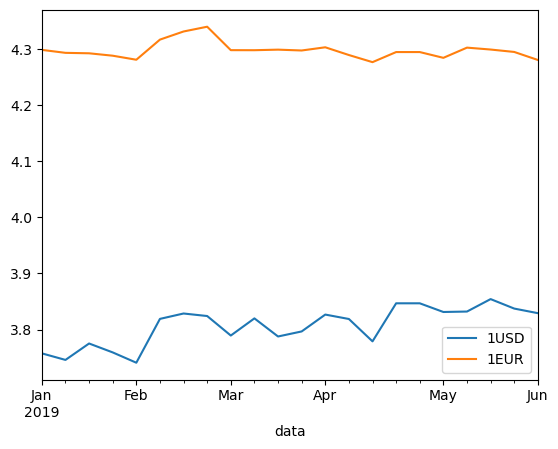

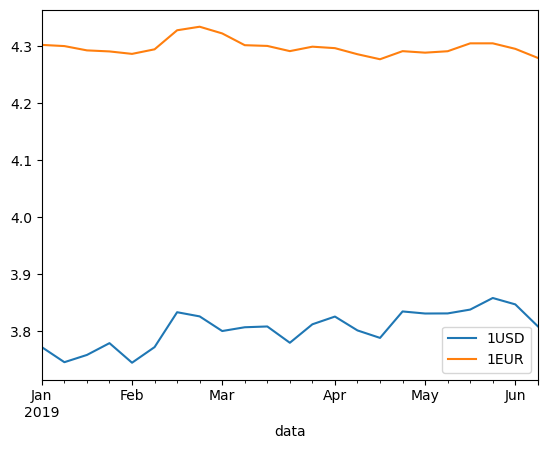

In [12]:
data=pd.read_csv("archiwum_tab_a_2019.csv",header=0,usecols=[0,2,8],delimiter=";",encoding="cp1250",index_col='data').iloc[:-3] 
data.dropna(how="any",inplace=True) 
data = data[data.index.notnull()] 
data.index=pd.to_datetime(data.index,format="%Y%m%d")

for col in data.columns: 
    data[col]=data[col].str.replace(",",'.')
    data[col] = data[col].astype(float)
data_mon=data.asfreq('W-MON')
data_mon.fillna(method='bfill',inplace=True) 
data_mon.plot() 
data.resample(rule="1W").mean().plot() 

## Zadanie 4.
W folderze `IMGW` znajdują się dane ze stacji meteorologicznej w Poznaniu z lat 2008-2018 wraz z osobnym plikiem opisującym zawartość kolumn.


In [13]:
#wczytanie danych
data=pd.DataFrame(columns=['max','min','mean'])
for year in range(2008,2019):
    data_temp=pd.read_csv(f"IMGW/s_d_330_{year}.csv",encoding="cp1250",header=None,parse_dates={"date" : [2,3,4]},usecols=[2,3,4,5,7,9],index_col='date')
    data_temp.columns=['max','min','mean']
    data=pd.concat([data,data_temp],axis=0)
for col in data.columns:
    data[col] = data[col].astype(float)

- Naszkicować wykresy: średniej, minimalnej i maksymalnej temperatury miesięcznej na przestrzeni lat 2016-2018.


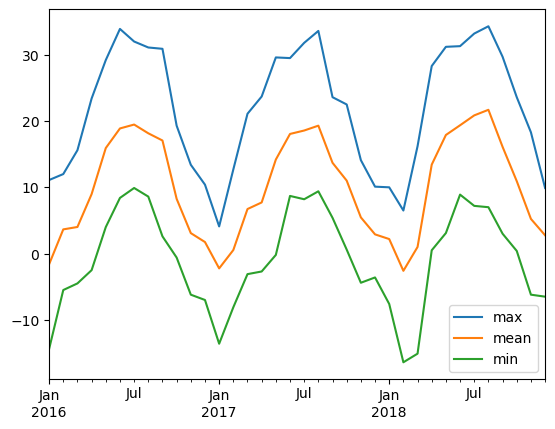

In [14]:
import matplotlib.pyplot as plt
data.loc['2016':'2018']['max'].resample(rule='M').max().plot()
data.loc['2016':'2018']['mean'].resample(rule='M').mean().plot()
data.loc['2016':'2018']['min'].resample(rule='M').min().plot()
plt.legend()

- Na wykresie słupkowym zestawić średnie temperatury tygodniowe z czerwca na przestrzeni lat 2016-2018.


<Axes: >

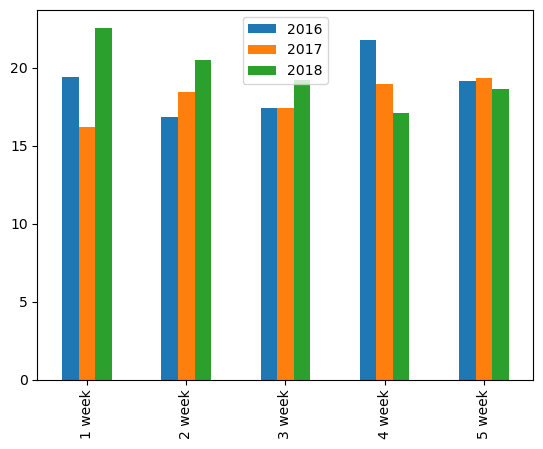

In [15]:
data_temp=pd.DataFrame()
for year in [2016,2017,2018]: 
    data_temp=pd.concat([data_temp,data['mean'].loc[f"{year}-06-01":f"{year}-06-30"].resample(rule='W-MON').mean()]) 
pd.DataFrame(data_temp.values.reshape(3,5).T, index=['1 week','2 week','3 week','4 week','5 week'], columns=[2016,2017,2018]).plot.bar() 


- Na wykresie liniowym przedstawić zmianę średniej maksymalnej temperatury w czerwcu w latach 2008-2018.


Text(0.5, 1.0, 'Mean of max temp in june')

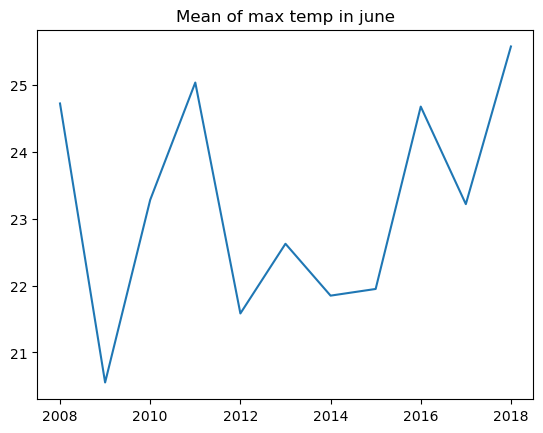

In [16]:
data_temp=[]
for year in range(2008,2019):
    data_temp.append(data['max'].loc[f"{year}-06-01":f"{year}-06-30"].mean()) 
plt.plot(range(2008,2019),data_temp) 
plt.title('Mean of max temp in june')

- Na dowolnym rodzaju wykresu przedstawić średnie temperatury w weekendy w poszczególnych miesiącach w latach 2016-2018.

<Axes: >

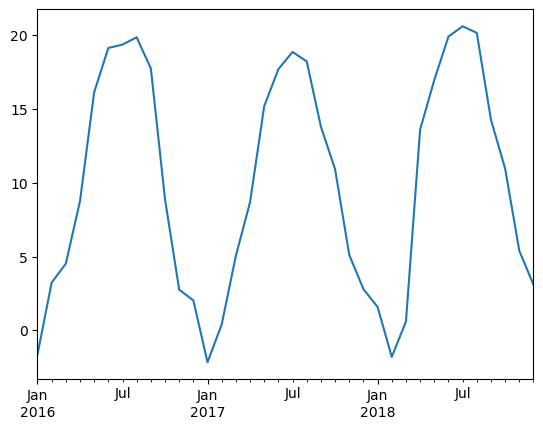

In [17]:
data['mean'].drop(data.asfreq("B").index).loc['2016':'2018'].resample(rule="M").mean().plot()